In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# Step: 1 Load the CSV files

#### First combine all the csv files into one. You do this by opening a new folder and saving all relevant files needed in it then type the following lines of code to combine them into one: 

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
branches = pd.concat([pd.read_csv(f) for f in all_filenames])
branches.to_csv('branches.csv', index = False, encoding = 'utf-8-sig' )

# Step 2: Data exploration

In [4]:
df = pd.read_csv('branches.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [5]:
df.shape #Shows the number of rows and columns in the data frame

(1000, 17)

In [6]:
df.columns #lists the names of the columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.describe() #Gives a statistical summary of all the colums in a data frame

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### Interpretation of values

#### Mean: The average unit price across all the stores is N20,041.96 (this is exclusive of tax), while the average quantity sold is approximately 6 units (5.51 units). A sum of N5,536.57 is the average amount paid as 5% tax fee for customer buying. The average total price of goods i.e. including tax is N116,268.03. The average amount of cost of goods sold spread across the three stores is N110,731.45. The average gross margin percentafe is 4.76%, while the average gross income is N5,536.57. Customers gave an average satisfaction rating 6.9% across all three stores

#### Std (Standard deviation): The standard deviation tells us how far apart other figures are in relation to the mean. A high standard deviation means that the figures are spread out while a low standard deviation means that figures in the data are clustered around the mean. In relation to the unit price, the standard deviation is high at N9, 538.06 while the mean is at N20,041.96.  The standard deviation of the quantity is not too high at 2 units in comparison to the mean at 5 units. The standard deviation of the tax is low in comparison with the mean. They are closely clustered together. The standard deviaton of the total price of food N88,518.72 which includes tax in its summation, is high when compared to the mean of N116,268.03.  

#### Min: The minimum price per unit of goods sold across the three stores is N3,628.80. While the minimum quantity sold is 1 unit. The minimum amount of tax paid is N183.06. The minimum cost of goods sold is N3,661.20.

In [8]:
df.isnull().sum().sort_values(ascending = False)/len(df) #shows that there arent any missing values

Invoice ID                 0.0
Total                      0.0
gross income               0.0
gross margin percentage    0.0
cogs                       0.0
Payment                    0.0
Time                       0.0
Date                       0.0
Tax 5%                     0.0
Branch                     0.0
Quantity                   0.0
Unit price                 0.0
Product line               0.0
Gender                     0.0
Customer type              0.0
City                       0.0
Rating                     0.0
dtype: float64

In [9]:
df.info() #gives information about total column number, column name, dtype, total number of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Step 3: Dealing with DateTime features

In [10]:
import datetime as dt

#### From running the .info function above, we can see that time and date functions are object dtypes instead of DateTime dtype. So we will change them to their appropriate dtypes.

In [11]:
Date1 = pd.to_datetime(df['Date'])
Date1

0     2019-02-20
1     2019-02-06
2     2019-03-09
3     2019-01-15
4     2019-03-11
         ...    
995   2019-01-23
996   2019-01-09
997   2019-03-29
998   2019-02-18
999   2019-01-29
Name: Date, Length: 1000, dtype: datetime64[ns]

In [12]:
Time1 =pd.to_datetime(df['Time'])
Time1

0     2022-12-21 13:27:00
1     2022-12-21 18:07:00
2     2022-12-21 17:03:00
3     2022-12-21 16:19:00
4     2022-12-21 15:30:00
              ...        
995   2022-12-21 10:33:00
996   2022-12-21 11:40:00
997   2022-12-21 19:12:00
998   2022-12-21 11:40:00
999   2022-12-21 13:46:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [13]:
Date_Year = Date1.dt.year
Date_Year.unique()

array([2019], dtype=int64)

In [14]:
Date_Month = Date1.dt.month
Date_Month.unique()

array([2, 3, 1], dtype=int64)

In [15]:
Date_Day = Date1.dt.day
Date_Day.unique()

array([20,  6,  9, 15, 11,  5,  8, 25, 28, 10,  3, 17, 27, 22,  7, 14, 26,
       12, 29, 19, 16, 23,  4, 30, 18,  2, 24, 31, 21, 13,  1],
      dtype=int64)

In [16]:
Time_Hour = Time1.dt.hour
Time_Hour.unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

# Step 4: Unique Values in categorical columns using the value_counts() function 

In [17]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_col

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

In [18]:
df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [19]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [20]:
    df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [21]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [22]:
df['Date'].value_counts()

2/7/2019     20
2/15/2019    19
3/14/2019    18
1/8/2019     18
3/2/2019     18
             ..
2/28/2019     6
3/17/2019     6
3/21/2019     6
2/21/2019     6
1/4/2019      6
Name: Date, Length: 89, dtype: int64

In [23]:
df['Time'].value_counts()

14:42    7
19:48    7
17:38    6
19:20    5
19:39    5
        ..
16:20    1
16:31    1
11:19    1
16:55    1
19:12    1
Name: Time, Length: 506, dtype: int64

In [24]:
df['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

# Step 5: GroupBy

In [25]:
City_gb = df.groupby('City')
City_gb

In [26]:
City_gb.sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,
Abuja,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6
Lagos,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2
Port Harcourt,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9


In [27]:
City_gb.mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,
Abuja,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072
Lagos,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059
Port Harcourt,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866


In [28]:
City_gb['gross income'].sum().sort_values(ascending = False)

City
Port Harcourt    1895463.54
Lagos            1820577.78
Abuja            1820531.52
Name: gross income, dtype: float64

#### Port Hartcourt has the highest gross income of all the supermarket branches (cities) with N1,895,463.54 as its total gross income for the period considered

# Step 6: Visualization

Text(0.5, 1.0, 'Sales record per branch')

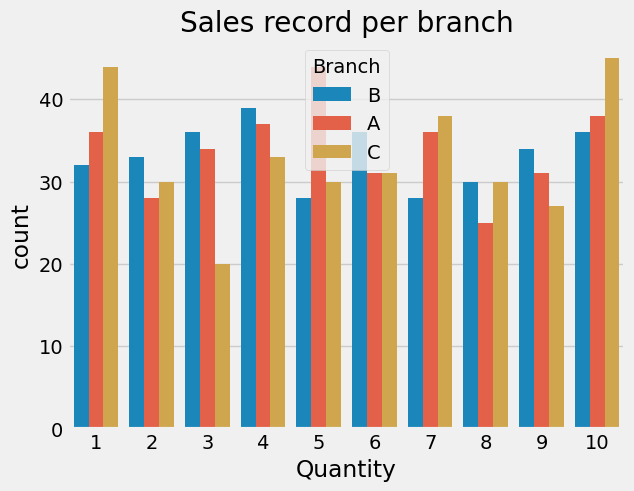

In [29]:
sns.countplot(x = 'Quantity', hue = 'Branch', data = branches).set_title('Sales record per branch')

Text(0.5, 1.0, 'Payment method per city')

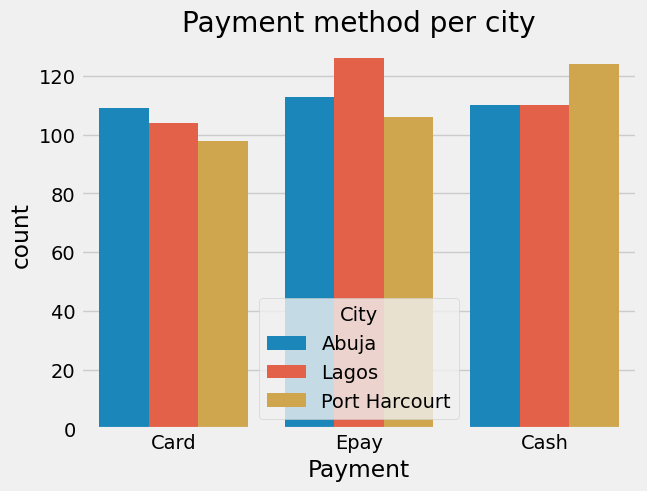

In [30]:
sns.countplot(x = 'Payment', hue = 'City', data = branches).set_title('Payment method per city')

Text(0.5, 1.0, 'Highest and Lowest sold product line')

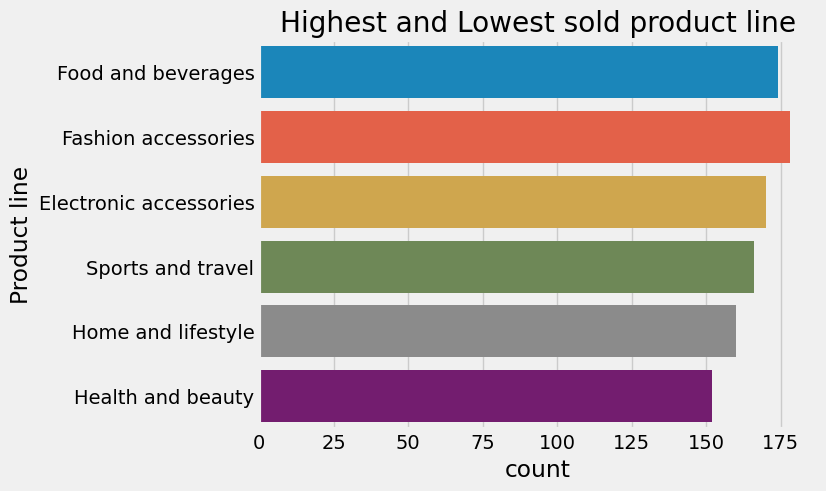

In [31]:
sns.countplot(y = 'Product line', data = branches).set_title('Highest and Lowest sold product line')

Text(0.5, 1.0, 'Product Analysis')

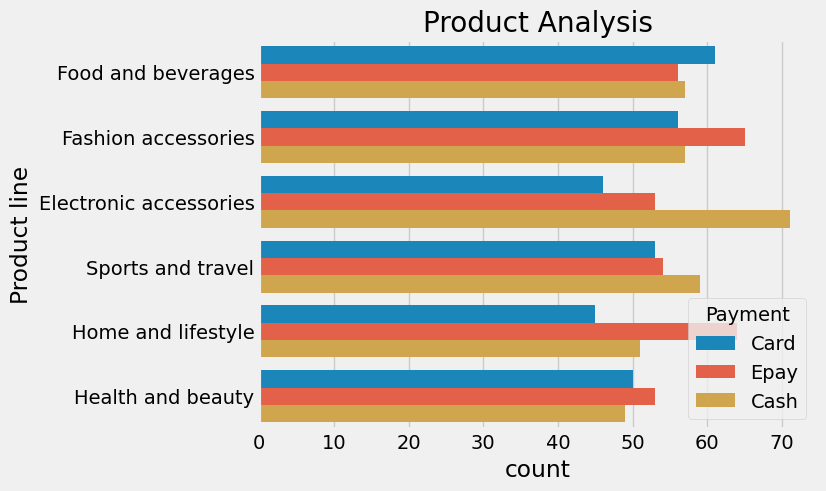

In [32]:
sns.countplot(y = 'Product line', hue = 'Payment', data = branches).set_title('Product Analysis')

Text(0.5, 1.0, 'Gross income per branch')

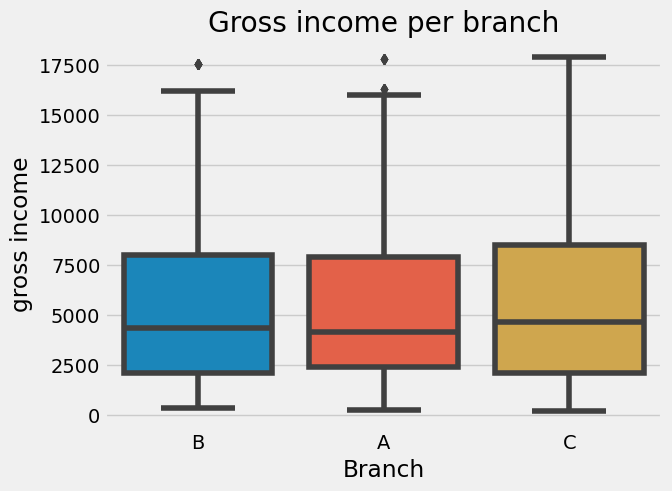

In [154]:
sns.boxplot(x = 'Branch', y = 'gross income', data = branches).set_title('Gross income per branch')

#### Branch C has the highest gross income followed by branch B. While branch A has the lowest gross income. 

Text(0.5, 1.0, 'Payment Analysis')

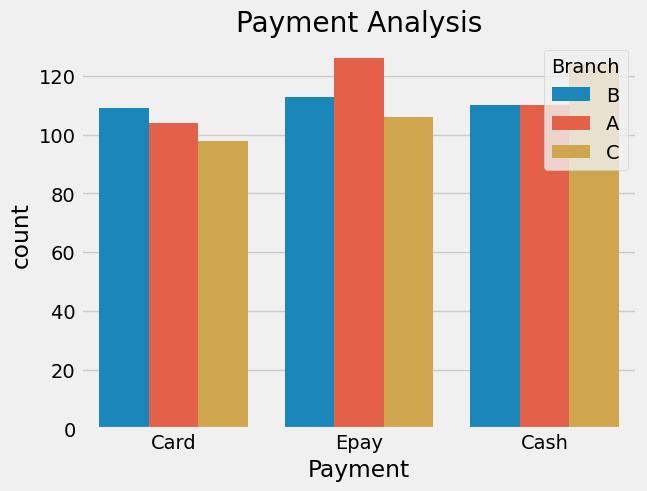

In [37]:
sns.countplot(x = 'Payment', hue = 'Branch', data = branches).set_title('Payment Analysis')

#### Card: Branch B has the highest amount of card payments followed by branch A and branch C respectively.
#### Epay: Branch A has the highest Epayments followed by branches B and C respectively.
#### Cash: The amount of payments for cash payments among the three branches are the same.

Text(0.5, 1.0, 'Ratings per branch')

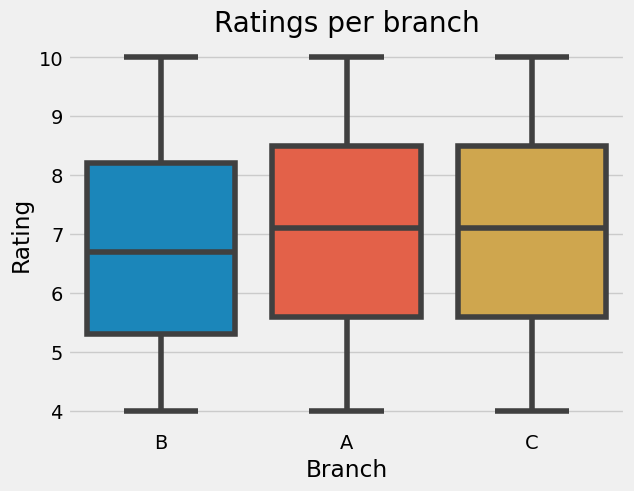

In [40]:
sns.boxplot(x = 'Branch', y = 'Rating', data = branches).set_title('Ratings per branch')

#### The branch with the lowest rating is branch B because branch B has the lowest interquartile ratings of the three branches

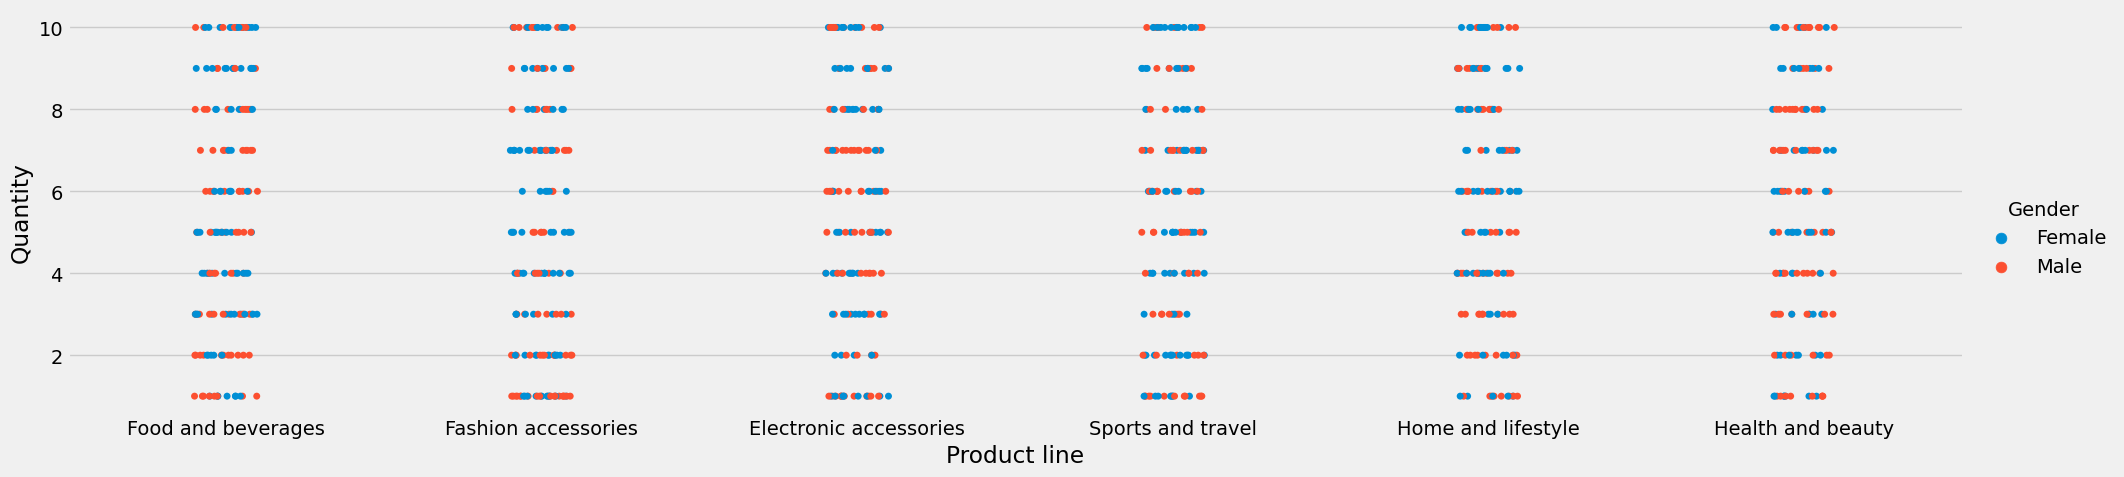

In [46]:
sns.catplot(x = 'Product line', y = 'Quantity', hue = 'Gender', data = branches, aspect = 4)

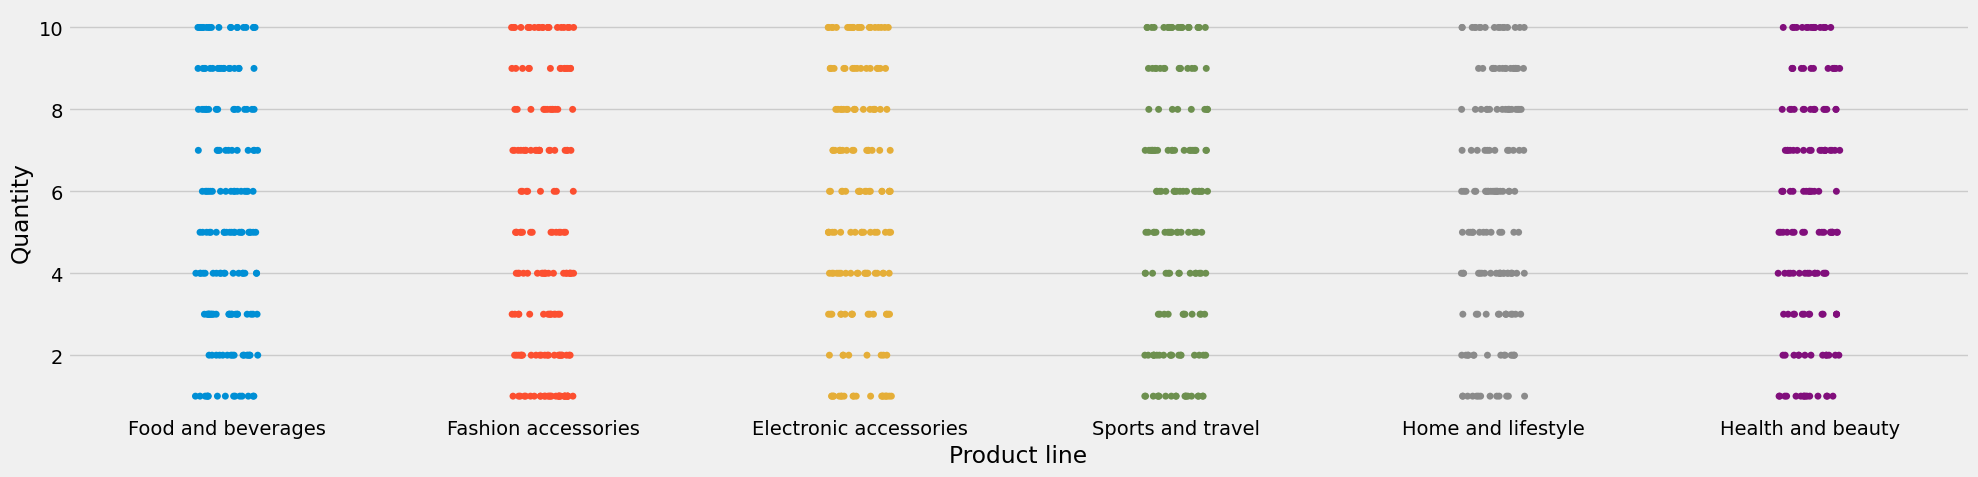

In [52]:
sns.catplot(x = 'Product line', y = 'Quantity', units = 'product line per unit price', data = branches, aspect = 4)

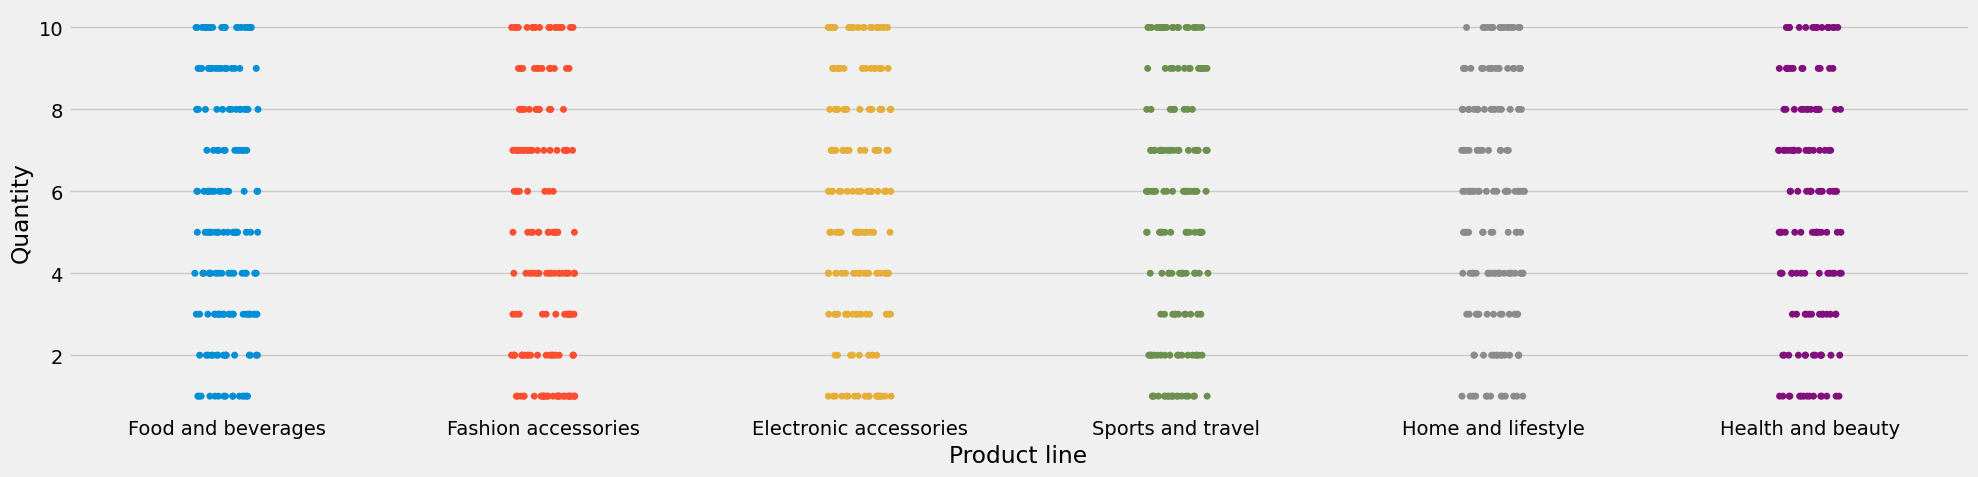

In [53]:
sns.catplot(x = 'Product line', y = 'Quantity', units = 'product line per quantity', data = branches, aspect = 4)